<a href="https://colab.research.google.com/github/HemantRajpal-9018/Core/blob/main/Heart_Attack_Prediction_Part_1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Libraries for Exploratory Data Analysis
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/My Drive/csv/github/heart.csv')
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [ ]:
df.shape

(303, 14)

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


there are no nulls

## Check data type

In [ ]:
# to know the type of variable
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [ ]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
# change the categorical type to categorical variables
df['sex'] = df['sex'].astype('object')
df['cp'] = df['cp'].astype('object')
df['fbs'] = df['fbs'].astype('object')
df['restecg'] = df['restecg'].astype('object')
df['exang'] = df['exang'].astype('object')
df['slope'] = df['slope'].astype('object')
df['ca'] = df['ca'].astype('object')
df['thal'] = df['thal'].astype('object')
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target        int64
dtype: object

In [ ]:
df['ca'].unique()

array([0, 2, 1, 3, 4], dtype=object)

In [ ]:
# to count the number in of each category decending order
df.ca.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [ ]:
# to check missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# change the labelling for better interpretation/ visualization understanding
df['target'] = df.target.replace({1: "Disease", 0: "No_disease"})
df['sex'] = df.sex.replace({1: "Male", 0: "Female"})
df['cp'] = df.cp.replace({1: "typical_angina", 
                          2: "atypical_angina", 
                          3:"non-anginal pain",
                          4: "asymtomatic"})
df['exang'] = df.exang.replace({1: "Yes", 0: "No"})
df['slope'] = df.cp.replace({1: "upsloping", 
                          2: "flat", 
                          3:"downsloping"})
df['thal'] = df.thal.replace({1: "fixed_defect", 2: "reversable_defect", 3:"normal"})

In [ ]:
# to know the basic stats
df.describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


## EDA on Heart Disease Dataset

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Disease       165
No_disease    138
Name: target, dtype: int64


Text(0.5, 1.0, 'Heart Disease Classes')

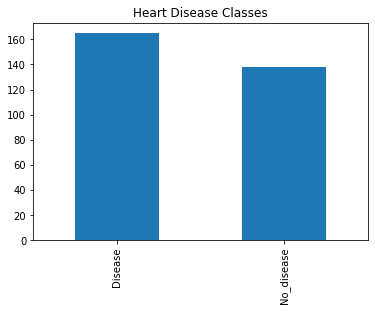

In [ ]:
print(df.target.value_counts())
df['target'].value_counts().plot(kind='bar').set_title('Heart Disease Classes')

Text(0.5, 1.0, 'Age Distribution')

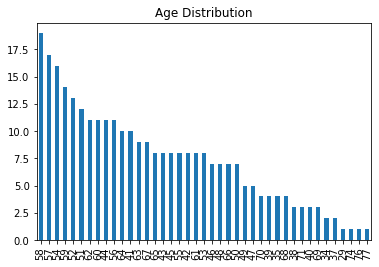

In [ ]:
# print(df.age.value_counts())
df['age'].value_counts().plot(kind='bar').set_title('Age Distribution')

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
Name: age, dtype: int64


Text(0, 0.5, 'Age distribution')

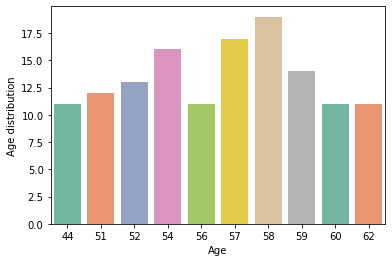

In [ ]:
# Analyze distribution in age in range 10
print(df.age.value_counts()[:10])
sns.barplot(x=df.age.value_counts()[:10].index,
            y=df.age.value_counts()[:10].values,
            palette='Set2')
plt.xlabel('Age')
plt.ylabel('Age distribution')

In [ ]:
# to know the youngest or oldest in age
print(min(df.age))
print(max(df.age))
print(df.age.mean())

29
77
54.366336633663366


Male      207
Female     96
Name: sex, dtype: int64


Text(0.5, 1.0, 'sex Distribution')

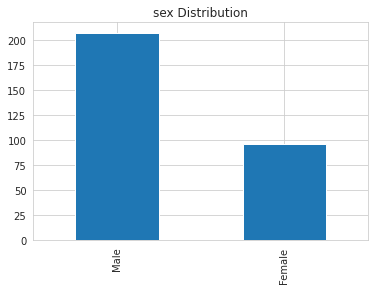

In [ ]:
print(df.sex.value_counts())
df['sex'].value_counts().plot(kind='bar').set_title('sex Distribution')

0                   143
atypical_angina      87
typical_angina       50
non-anginal pain     23
Name: cp, dtype: int64


Text(0.5, 1.0, 'Chest Pain Distribution')

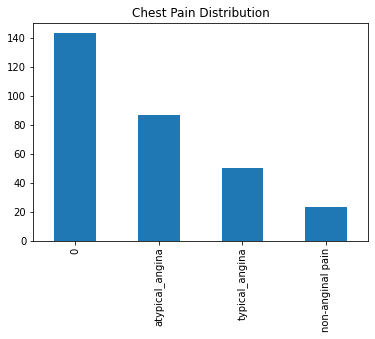

In [ ]:
print(df.cp.value_counts())
df['cp'].value_counts().plot(kind='bar').set_title('Chest Pain Distribution')

1    152
0    147
2      4
Name: restecg, dtype: int64


Text(0.5, 1.0, 'Resting ECG Distribution')

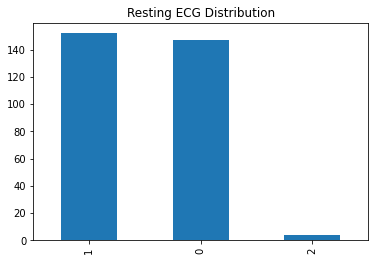

In [ ]:
print(df.restecg.value_counts())
df['restecg'].value_counts().plot(kind='bar').set_title('Resting ECG Distribution')

No     204
Yes     99
Name: exang, dtype: int64


Text(0.5, 1.0, 'Exercise Induced Angina Distribution')

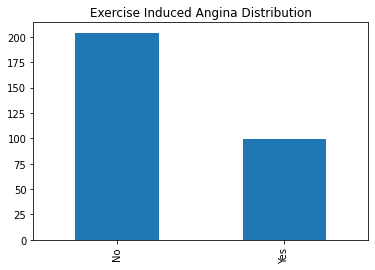

In [ ]:
print(df.exang.value_counts())
df['exang'].value_counts().plot(kind='bar').set_title('Exercise Induced Angina Distribution')

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64


Text(0.5, 1.0, 'NUmber of Major Vessel Distribution')

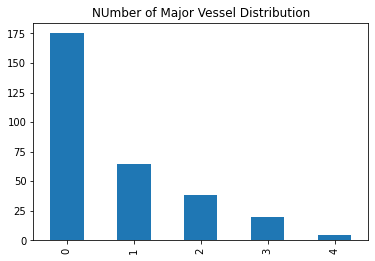

In [ ]:
print(df.ca.value_counts())
df['ca'].value_counts().plot(kind='bar').set_title('NUmber of Major Vessel Distribution')

reversable_defect    166
normal               117
fixed_defect          18
0                      2
Name: thal, dtype: int64


Text(0.5, 1.0, 'thal Distribution')

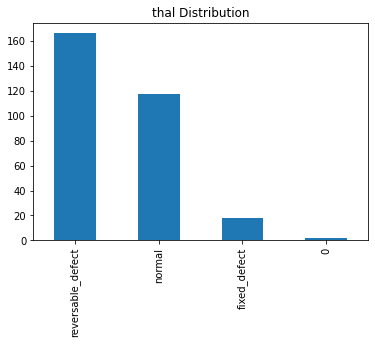

In [ ]:
print(df.thal.value_counts())
df['thal'].value_counts().plot(kind='bar').set_title('thal Distribution')

# Visualize categorical data distribution

Text(0.5, 1.0, 'Disease classes according to Sex')

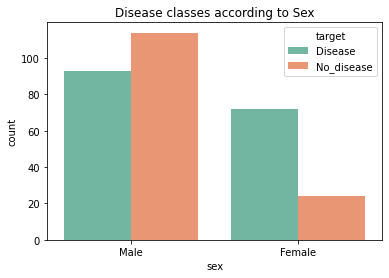

In [ ]:
sns.countplot(x='sex', hue='target', data=df, palette='Set2').set_title('Disease classes according to Sex')

Text(0.5, 1.0, 'Disease classes according to Chest Pain')

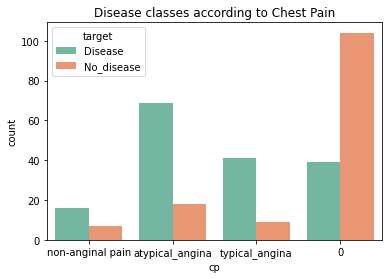

In [ ]:
sns.countplot(x='cp', hue='target', data=df, palette='Set2').set_title('Disease classes according to Chest Pain')

Text(0.5, 1.0, 'Disease classes according to thal')

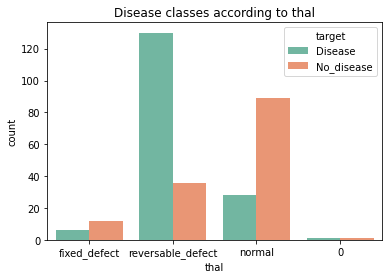

In [ ]:
sns.countplot(x='thal', hue='target', data=df, palette='Set2').set_title('Disease classes according to thal')

Text(0.5, 1.0, 'Disease classes according to Exercise Induced Angina')

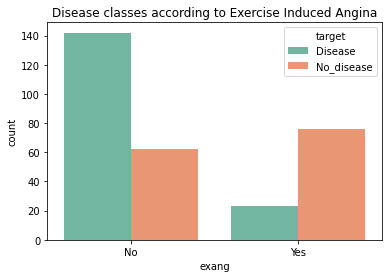

In [ ]:
sns.countplot(x='exang', hue='target', data=df, palette='Set2').set_title('Disease classes according to Exercise Induced Angina')

Text(0.5, 1.0, 'Disease classes according to fbs')

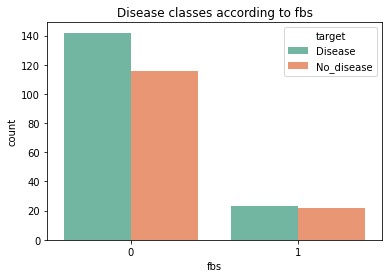

In [ ]:
sns.countplot(x='fbs', hue='target', data=df, palette='Set2').set_title('Disease classes according to fbs')

Text(0.5, 1.0, 'Disease classes according to Num Major Vessel')

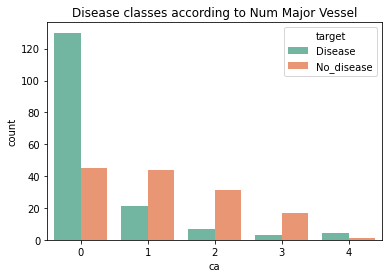

In [ ]:
sns.countplot(x='ca', hue='target', data=df, palette='Set2').set_title('Disease classes according to Num Major Vessel')

# Visualize all together

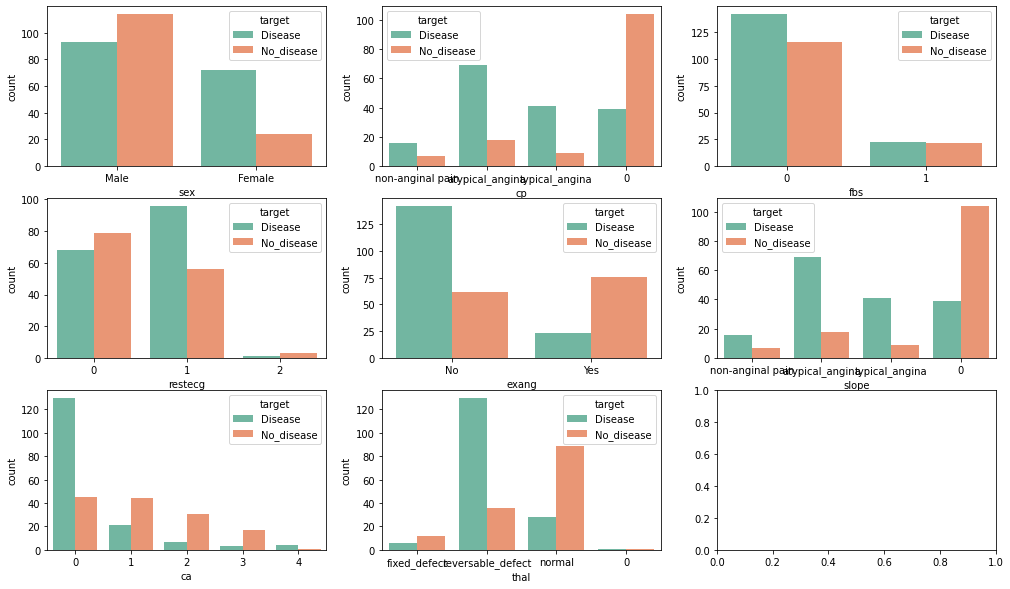

In [ ]:
# for plotting, group categorical features in cat_feat
# to create dist in 8 feature, 9th is the target, 
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    if feature != 'target':
        sns.countplot(x=feature, hue='target', data=df, ax=ax, palette='Set2')

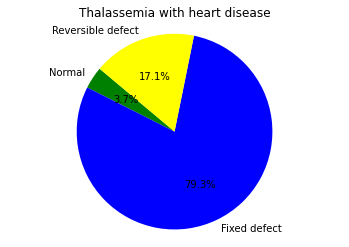

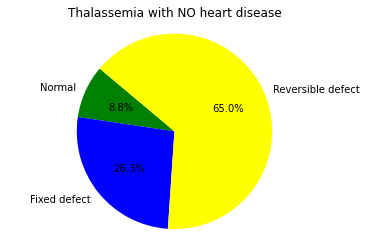

In [ ]:
# Another way of visualizing: Pie charts for thalassemia Having heart disease

labels= 'Normal', 'Fixed defect', 'Reversible defect'
sizes=[6, 130, 28]
colors=['green', 'blue', 'yellow']
plt.pie(sizes, labels=labels, colors=colors, autopct='%.1f%%', startangle=140)
plt.axis('equal')
plt.title('Thalassemia with heart disease')
plt.show()

# Not having heart disease
labels= 'Normal', 'Fixed defect', 'Reversible defect'
sizes=[12, 36, 89]
colors=['green', 'blue', 'yellow']
plt.pie(sizes, labels=labels, colors=colors, autopct='%.1f%%', startangle=140)
plt.axis('equal')
plt.title('Thalassemia with NO heart disease')
plt.show()

## Visualize the distribution of continuous variable across target variable

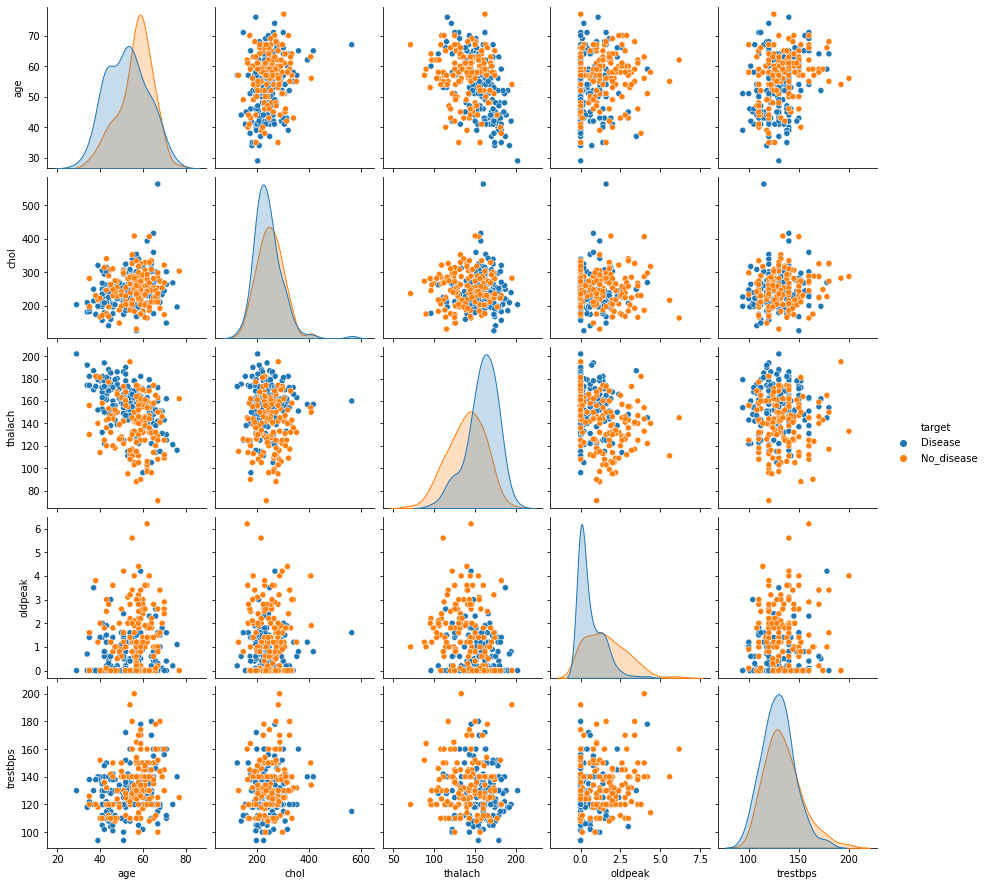

In [ ]:
# define continuous variable & plot
continous_features = ['age', 'chol', 'thalach', 'oldpeak','trestbps']  
sns.pairplot(df[continous_features + ['target']], hue='target')

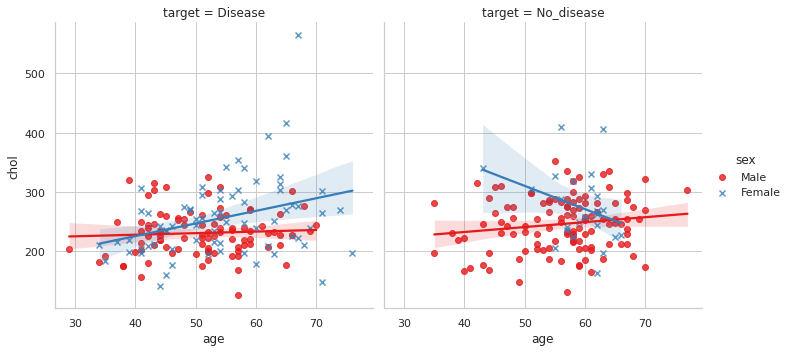

In [ ]:
# to understand the relationship between age and chol in each of the target based on sex.
sns.lmplot(x="age", y="chol", hue="sex", col="target",
           markers=["o", "x"],
           palette="Set1",
           data=df)
plt.show()

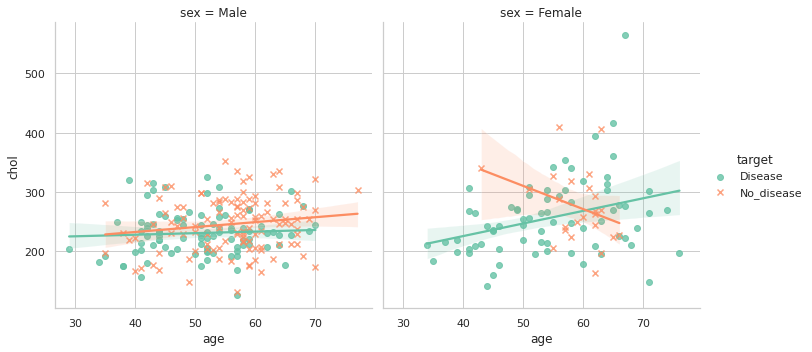

In [ ]:
# to understand the relationship between age and chol in each of the sex, based on target.
sns.lmplot(x="age", 
           y="chol", 
           hue="target", 
           col="sex",
          #  row="target",
          #  order=2, 
           markers=["o", "x"],
           palette="Set2",
           data=df)
plt.show()

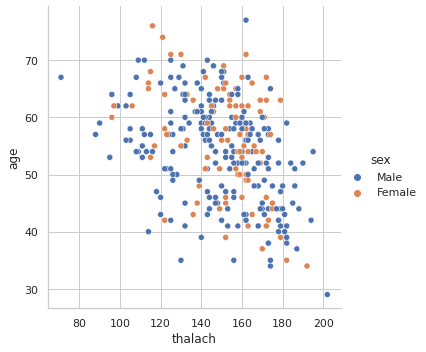

In [ ]:
# relation plot relplot
sns.relplot(x='thalach', y = 'age', hue='sex', data=df )

Let's see the correlations

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


(5.5, -0.5)

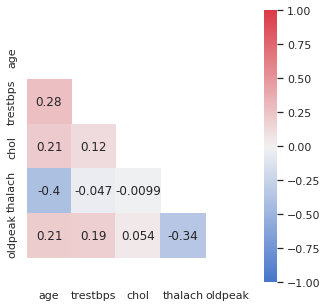

In [ ]:
# Correlation with Heatmap Visualization 
sns.set(style="white") 
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(5,5))
cmap = sns.diverging_palette(255, 10, as_cmap=True)
sns.heatmap(df.corr(), mask=mask, annot=True, square=True, cmap=cmap,vmin=-1, vmax=1, ax=ax)  

bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

## Now, lets apply automated EDA using pandas profiling report.

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     - 22.0 MB 137 kB/s
     |████████████████████████████████| 102 kB 5.1 MB/s 
     |████████████████████████████████| 696 kB 34.7 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 9.9 MB 54.1 MB/s 
     |████████████████████████████████| 4.7 MB 44.2 MB/s 
     |████████████████████████████████| 296 kB 58.1 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-dev-py2.py3-none-any.whl size=324949 sha256=aa532b9f37cee08f1db548c68a58d2eb25dcdac90b6f8bb3e64013fbf8df7d32
  Stored in directory: /tmp/pip-ephem-wheel-cache-0wdoalcd/wheels/64/b6/85/dfc808b23666a5910371784e349d28818006ff63ed9cfeca59
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=efd93b493d64cdf93f8b42ad5f72b66ade52c512ba62ec74918a3ce29256ffdd
  Stored in directory: /root/.cache/pip/wheels/23/14/6e/4be5bfeeb027f4939a01764b

In [ ]:
# restrat kernel
# re-run import libraries and data
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

Define Profile Report

In [ ]:
profile = ProfileReport(df, title="Heart Disease EDA", html={'style':{'full_width':True}})

In [ ]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Check for outliers

/usr/local/lib/python3.8/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.8/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


TypeError: ignored

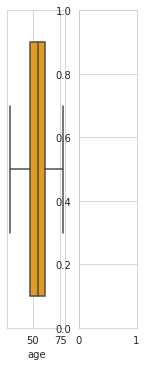

In [ ]:
# to check outliers
#https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15
l = df.columns.values
number_of_columns=12
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot (df[l[i]],color='orange',orient='v')
    plt.tight_layout()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f56b7a9aa60>,
      dtype=object)

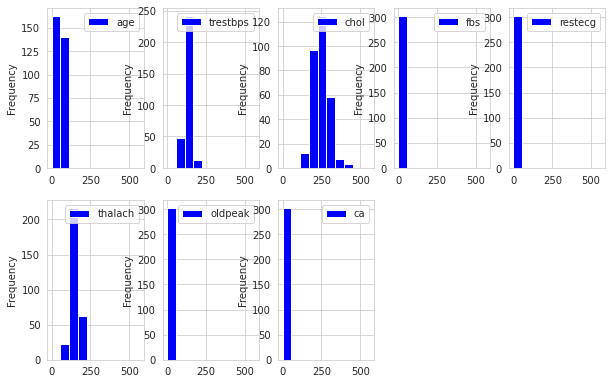

In [ ]:
df.plot(kind='hist', subplots=True, layout=(3,5),sharex=False,sharey=False, figsize=(10, 10), 
         color='blue')

Check outliers in each categorical features

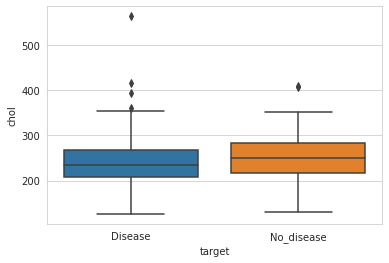

In [ ]:
sns.boxplot(x='target', y='chol', data=df)

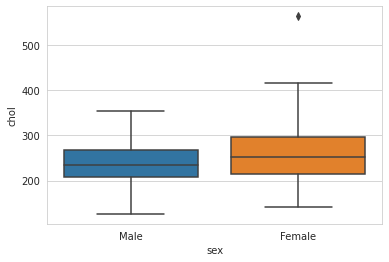

In [ ]:
sns.boxplot(x='sex', y='chol', data=df)

<Figure size 1080x720 with 0 Axes>

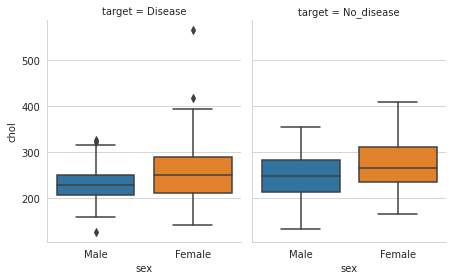

In [ ]:
plt.figure(figsize=(15,10))
sns.catplot(x='sex', y='chol', col='target', data=df, kind='box', height=4, aspect=.8)

<Figure size 1080x720 with 0 Axes>

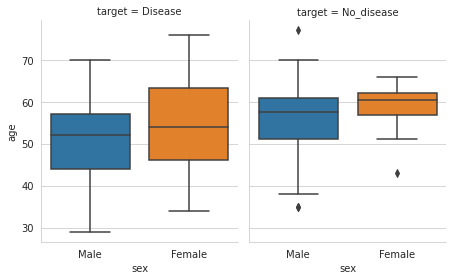

In [ ]:
plt.figure(figsize=(15,10))
sns.catplot(x='sex', y='age', col='target', data=df, kind='box', height=4, aspect=.8)